# Regressie - intro

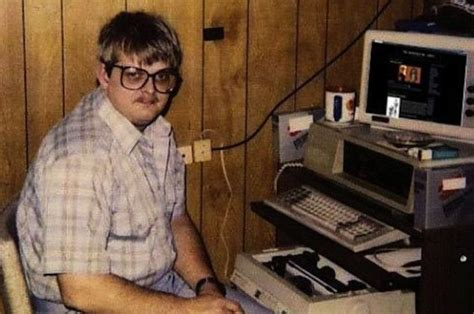

## Install

In [106]:
!pip3 install numpy
!pip3 install scipy

## Import

In [107]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as cp

## Predefine

In [108]:
def plot_init():
    
    fig, ax = plt.subplots()
    
    return ax


def plot_add(ax, x, y):
    
    ax.plot(x, y, linewidth=2.0)


def plot_show():
    
    plt.show()


def plot_graph(x, y):
    
    ax = plot_init()
    plot_add(ax, x, y)
    plot_show()

## Lineair verband
### Model
huizenprijs = vastgoed offset + prijs per oppervlak x oppervlak

p = 25.000 + 5.000 x oppervlak

### Stap 1: Maak huizenprijs model

1. gebruik numpy om datapunten (= x-waarden) te genereren in een bepaalde range
<br>
stap 2. bereken je Y-waarden
<br>
stap 3. genereer ' noise' met numpy (functie: ??? en 
<br>
stap 4: plot graph
<br>



In [109]:
# genereer datapunten
# numpy.arange([start, ]stop, [step, ]dtype=None, *, like=None)
opp = np.arange(50,200, 1) # opp = oppervlakte is array met aantal vierkante meters - mijn range is 50 - 200. Stapgrootte = 1
# Opm: een array is niet hetzelfde als een lijst
print(opp) 
print(f'Deze array bevat {len(opp)} datapunten.')

[ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 196 197 198 199]
Deze array bevat 150 datapunten.


In [110]:
#stap 2. bereken je Y-waarden
offset = 25000
priceOpp = 5000 * opp
priceHouse = priceOpp + offset # deze formule genereert je Y waarden

print(priceHouse)
print(f'Deze array bevat {len(priceHouse)} datapunten.')

[ 275000  280000  285000  290000  295000  300000  305000  310000  315000
  320000  325000  330000  335000  340000  345000  350000  355000  360000
  365000  370000  375000  380000  385000  390000  395000  400000  405000
  410000  415000  420000  425000  430000  435000  440000  445000  450000
  455000  460000  465000  470000  475000  480000  485000  490000  495000
  500000  505000  510000  515000  520000  525000  530000  535000  540000
  545000  550000  555000  560000  565000  570000  575000  580000  585000
  590000  595000  600000  605000  610000  615000  620000  625000  630000
  635000  640000  645000  650000  655000  660000  665000  670000  675000
  680000  685000  690000  695000  700000  705000  710000  715000  720000
  725000  730000  735000  740000  745000  750000  755000  760000  765000
  770000  775000  780000  785000  790000  795000  800000  805000  810000
  815000  820000  825000  830000  835000  840000  845000  850000  855000
  860000  865000  870000  875000  880000  885000  8

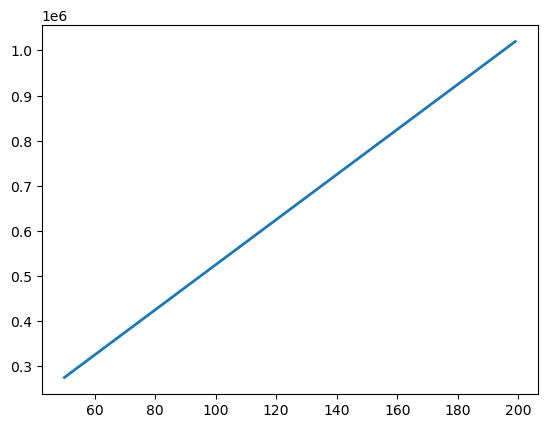

In [111]:
plot_graph(opp, priceHouse)

In [119]:
# noiseHousePr = np.random.normal(priceHouse,1,150) moet dan worden: 

noiseHousePr = np.random.normal(priceHouse,15000,150).astype(int) #45000 is de toegestane noise-afwijking, 60 is de lengte van de eerder geproduceerde lijst.
print(f'De lijst {noiseHousePr} bevat {len(noiseHousePr)} datapunten.')                            

De lijst [ 286413  279198  258431  289184  294812  316339  305013  308098  311118
  320116  309182  298162  333170  337322  340030  370901  330666  354995
  366556  390598  374553  376718  391502  371685  391583  408957  399577
  424950  419993  412212  417068  430723  442660  443708  432265  423460
  456029  439138  427489  464235  483389  484882  485439  502662  478487
  500796  500319  495978  543781  508126  494413  511606  514993  557152
  550981  533915  542497  573812  555926  586049  586053  568055  579702
  576676  599163  579419  594922  589477  629355  651322  629065  624013
  653538  623457  655310  626332  661285  627477  668248  656621  690827
  663248  701493  667590  705051  688470  737719  715828  696473  706081
  743359  731873  719371  768457  714930  763163  763101  799467  787129
  756474  772840  789248  793912  764188  816770  784574  794662  791621
  831779  816545  818130  840756  827263  853531  821552  828933  857720
  876452  863923  877205  861317  863883  

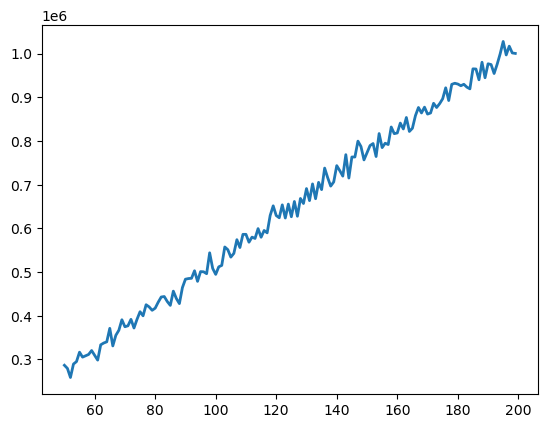

In [120]:
# plot alle huidige gegevens
plot_graph(opp,noiseHousePr)
plot_show()


### Stap 2: Bekijk interval [50, 75] m2

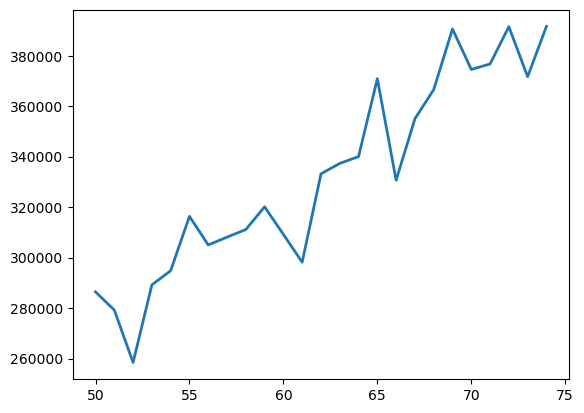

In [124]:

#bekijk de gegevens op het interval 50  -75  (75 doet zelf niet meer mee in het interval)
opp50_75 = opp[0:25]
noiseHousePr50_75 = noiseHousePr[0:25]
plot_graph(Opp50_75,noiseHousePr50_75 )
plot_show()

### Stap 3: Fit data

#### Use the curve fitting

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

Volgens bovenstaande link moet je de lijn gaan trekken met onderstaande functie:
scipy.optimize.curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, *, full_output=False, **kwargs)
In deze functie moet je nog verplicht 3 parameters invullen:
- f moet callable zijn - dat betekent dat het een functie moet zijn. Dit gaat in wezen om de berekening waarmee je de oorspronkelijke huizenprijs berekent. Die moet je ombouwen naar een def...
- de 2e parameter = lijst met oppervlaktes
- de 3e parameter  = lijst met noise-prijzen
    

[ 4992.92308683 22692.56861645]


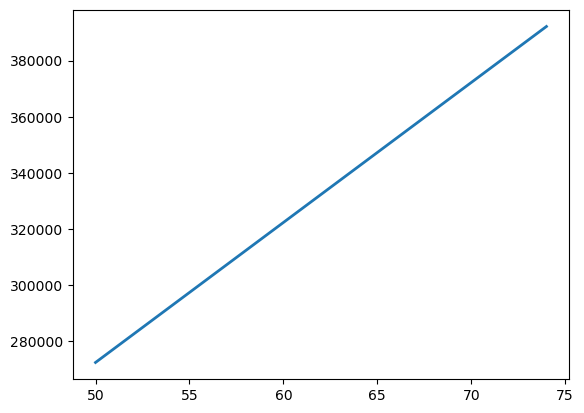

In [188]:
# Define our model
#Je moet hier een functie maken die de lineaire regressie gaat maken.

def fPriceHouse(x, a, b): 
    y = a*x + b
    return y



# Create fit

# Use scipy optimize package
# https://pythonguides.com/python-scipy-curve-fit/
# Gebruik hier alleen een deel van de data - de slice 50 - 75 mtrs
optimLine, var = cp.optimize.curve_fit(fPriceHouse, opp50_75, noiseHousePr50_75)#, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, *, full_output=False, **kwargs)
# ...
print(optimLine)
# Plot fit

plot_graph(Opp50_75, optimLine[0] * Opp50_75 + optimLine[1])
plot_show()


### Stap 4: Extrapoleer

[ 5002.45701979 22288.42766566]


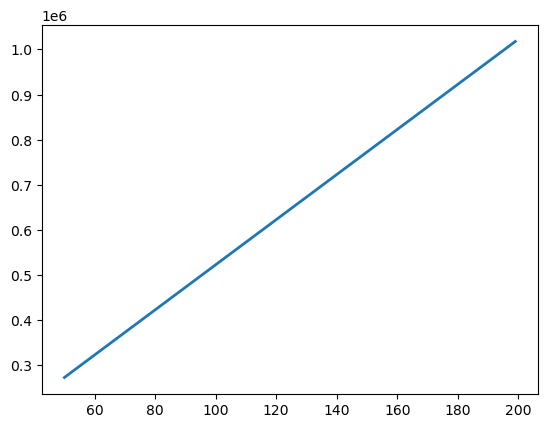

In [189]:
# Create fit

optimLine_all, var = cp.optimize.curve_fit(fPriceHouse, opp, noiseHousePr)
print(optimLine_all)
# Plot prediction for whole range

plot_graph(opp, optimLine_all[0] * opp + optimLine_all[1])
plot_show()


## Polynomiale verbanden

### Model

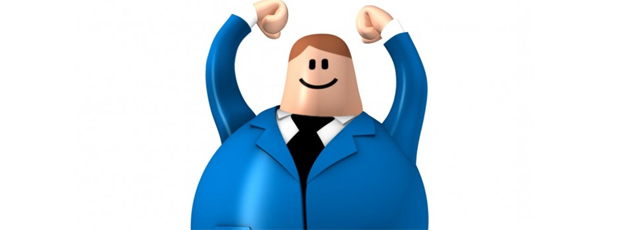

massa bolmannetje = dichtheid x bolvormigheid + benen + armen + hoofd

mass_bolman = 1.03 x radius^3 + 12.4 + 8.7 + 3.2

### Stap 1: Maak model bolmannetje

In [191]:
# ...
density = 1.03
radius = np.arange(30,150)        # de radius komt op de x-as
sphericity = radius**3 * density # '^' = tot de macht ...
legs = 12.4
arms = 8.7
head = 3.2

mass_bolman = sphericity + legs + arms + head # komt op de y-as

print(radius)
print(f'De array radius bevat {len(radius)} datapunten.')    
print(mass_bolman)
print(f'De array mass_bolman bevat {len(mass_bolman)} datapunten.')

[ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
De array radius bevat 120 datapunten.
[  27834.3    30709.03   33775.34   37039.41   40507.42   44185.55
   48079.98   52196.89   56542.46   61122.87   65944.3    71012.93
   76334.94   81916.51   87763.82   93883.05  100280.38  106961.99
  113934.06  121202.77  128774.3   136654.83  144850.54  153367.61
  162212.22  171390.55  180908.78  190773.09  200989.66  211564.67
  222504.3   233814.73  245502.14  257572.71  270032.62  282888.05
  296145.18  309810.19  323889.26  338388.57  353314.3   368672.63
  384

### Stap 2: Fit data

In [193]:
# Define our model

print(massbolman(density,radius,legs,arms,head))

#Noise toevoegen aan mass_bolman
noiseMass_Bolman = np.random.normal(mass_bolman,7000,120).astype(int) #1000 is de toegestane noise-afwijking, 90 is de lengte van de eerder geproduceerde lijst.
print(noiseMass_Bolman)
print(f'De array noiseMass_Bolman bevat {len(noiseMass_Bolman)} datapunten.') 


[  27834.3    30709.03   33775.34   37039.41   40507.42   44185.55
   48079.98   52196.89   56542.46   61122.87   65944.3    71012.93
   76334.94   81916.51   87763.82   93883.05  100280.38  106961.99
  113934.06  121202.77  128774.3   136654.83  144850.54  153367.61
  162212.22  171390.55  180908.78  190773.09  200989.66  211564.67
  222504.3   233814.73  245502.14  257572.71  270032.62  282888.05
  296145.18  309810.19  323889.26  338388.57  353314.3   368672.63
  384469.74  400711.81  417405.02  434555.55  452169.58  470253.29
  488812.86  507854.47  527384.3   547408.53  567933.34  588964.91
  610509.42  632573.05  655161.98  678282.39  701940.46  726142.37
  750894.3   776202.43  802072.94  828512.01  855525.82  883120.55
  911302.38  940077.49  969452.06  999432.27 1030024.3  1061234.33
 1093068.54 1125533.11 1158634.22 1192378.05 1226770.78 1261818.59
 1297527.66 1333904.17 1370954.3  1408684.23 1447100.14 1486208.21
 1526014.62 1566525.55 1607747.18 1649685.69 1692347.26 173573

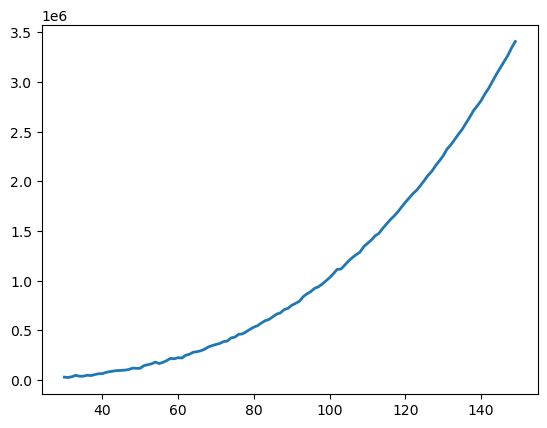

In [194]:
# plot alle huidige gegevens
plot_graph(radius, noiseMass_Bolman)
plot_show()

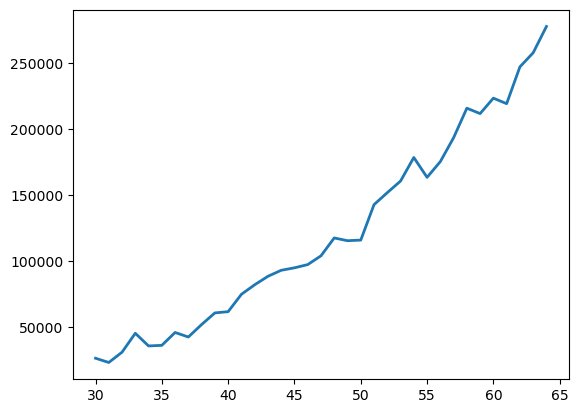

In [196]:
#bekijk de gegevens op het interval 30  - 65 (65 doet zelf niet meer mee in het interval)
radius30_65 = radius[0:35]
noiseMass_Bolman30_65 = noiseMass_Bolman[0:35]
plot_graph(radius30_65,noiseMass_Bolman30_65 )
plot_show()

(array([ 1.92732564e+01,  4.62398320e+05, -1.30302310e+05, -5.46741539e+05]), array([[ 5.41105582e-02, -1.09051061e+10,  3.01714927e+09,
         7.88795408e+09],
       [-1.09051061e+10,  4.15210762e+22, -1.65649616e+22,
        -2.49561144e+22],
       [ 3.01714927e+09, -1.65649616e+22,  1.54566819e+22,
         1.10827998e+21],
       [ 7.88795408e+09, -2.49561144e+22,  1.10827998e+21,
         2.38478340e+22]]))


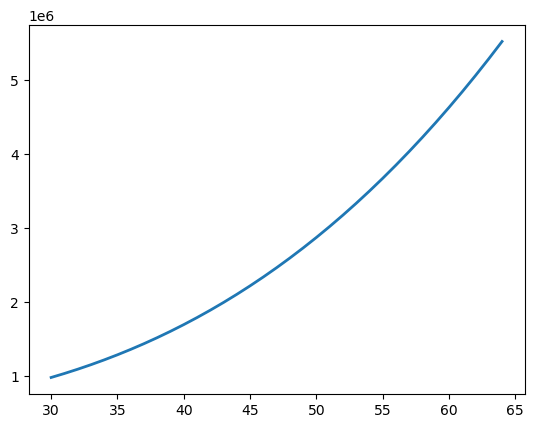

In [199]:

# Define our model
#Je moet hier een functie maken die de lineaire regressie gaat maken.


def massbolman(density,radius,legs, arms, head): 
    mass = density * radius**3 + legs + arms + head
    return mass

# Create fit

# Use scipy optimize package
# https://pythonguides.com/python-scipy-curve-fit/
# Gebruik hier alleen een deel van de data - de slice 50 - 75 mtrs
optimLine_massB = cp.optimize.curve_fit(massbolman, radius30_65, noiseMass_Bolman30_65)#, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, *, full_output=False, **kwargs)
# ...
print(optimLine_massB)
# Plot fit
y = optimLine_massB[0][0] * radius30_65**3 + optimLine_massB[0][1]

#plot_graph(radius30_65, optimLine_massB[0][0] * radius30_65**3 + optimLine_massB[0][1]) # 
plot_graph(radius30_65, y) # 
plot_show()

(array([ 1.92732564e+01,  4.62398320e+05, -1.30302310e+05, -5.46741539e+05]), array([[ 5.41105582e-02, -1.09051061e+10,  3.01714927e+09,
         7.88795408e+09],
       [-1.09051061e+10,  4.15210762e+22, -1.65649616e+22,
        -2.49561144e+22],
       [ 3.01714927e+09, -1.65649616e+22,  1.54566819e+22,
         1.10827998e+21],
       [ 7.88795408e+09, -2.49561144e+22,  1.10827998e+21,
         2.38478340e+22]]))


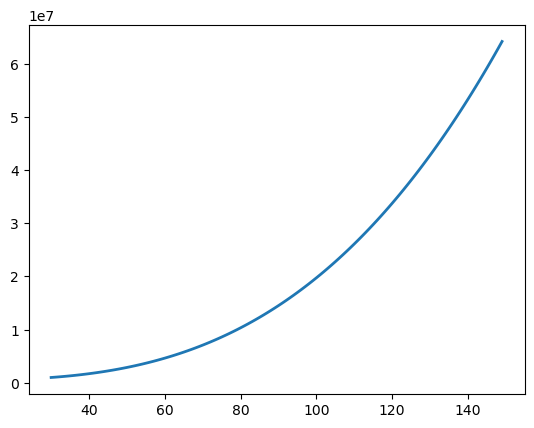

In [200]:
optimLine_massB = cp.optimize.curve_fit(massbolman, radius30_65, noiseMass_Bolman30_65)#, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, *, full_output=False, **kwargs)
# ...
print(optimLine_massB)
# Plot fit
y = optimLine_massB[0][0] * radius**3 + optimLine_massB[0][1]

#plot_graph(radius30_65, optimLine_massB[0][0] * radius30_65**3 + optimLine_massB[0][1]) # 
plot_graph(radius, y) # 
plot_show()

## Combinatie periodiek en exponentieel verband

### Model

Finding Seasonal Trends in Time-Series Data

https://towardsdatascience.com/finding-seasonal-trends-in-time-series-data-with-python-ce10c37aa861